[View in Colaboratory](https://colab.research.google.com/github/ZER-0-NE/ML_problems/blob/master/keras_vggface.ipynb)

In [2]:
from google.colab import auth
auth.authenticate_user()

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 10.1MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4079845718915876916, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11287966516
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5548440707347943602
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
fileId = drive.CreateFile({'id': '1FF0foAYabrhH2B030Z90nsN_cMiYyKjv'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('dataset_cfps.zip')  # Save Drive file as a local file

Copy of dataset_cfps.zip


In [5]:
!unzip dataset_cfps.zip -d ./

Archive:  dataset_cfps.zip
   creating: ./dataset_cfps/
   creating: ./dataset_cfps/train/
   creating: ./dataset_cfps/train/22q11/
  inflating: ./dataset_cfps/train/22q11/22q11_0_1029.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1046.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1186.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1303.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1433.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1464.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1521.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1538.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1563.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1852.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1906.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1987.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2158.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2174.jpg  
  inflating: ./dataset_cfps/train/22q11/22

  inflating: ./dataset_cfps/train/Down/Down965.jpg  
  inflating: ./dataset_cfps/train/Down/Down970.jpg  
  inflating: ./dataset_cfps/train/Down/Down973.jpg  
  inflating: ./dataset_cfps/train/Down/Down976.jpg  
  inflating: ./dataset_cfps/train/Down/Down979.jpg  
  inflating: ./dataset_cfps/train/Down/Down982.jpg  
  inflating: ./dataset_cfps/train/Down/Down985.jpg  
  inflating: ./dataset_cfps/train/Down/Down987.jpg  
  inflating: ./dataset_cfps/train/Down/Down990.jpg  
  inflating: ./dataset_cfps/train/Down/Down995.jpg  
   creating: ./dataset_cfps/train/FragileX/
  inflating: ./dataset_cfps/train/FragileX/FragileX (1).jpg  
  inflating: ./dataset_cfps/train/FragileX/FragileX (10).jpg  
  inflating: ./dataset_cfps/train/FragileX/FragileX (11).jpg  
  inflating: ./dataset_cfps/train/FragileX/FragileX (12).jpg  
  inflating: ./dataset_cfps/train/FragileX/FragileX (13).jpg  
  inflating: ./dataset_cfps/train/FragileX/FragileX (14).jpg  
  inflating: ./dataset_cfps/train/FragileX/Fragil

  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_7904.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_7960.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_7996.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8014.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8048.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8070.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8084.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8238.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8300.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8303.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_8331.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_834.jpg  
  inflating: ./dataset_cfps/t

In [6]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

!pip install keras_vggface

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.0 GB  I Proc size: 1.1 GB
GPU RAM Free: 564MB | Used: 10875MB | Util  95% | Total 11439MB
  Running setup.py bdist_wheel for keras-vggface ... - done
  Stored in directory: /content/.cache/pip/wheels/72/aa/01/eb7baeb2f6e2d2f0d2aabddb5f01d57fa22fbd019ee2799bf5
Successfully built keras-vggface


In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras import regularizers

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_7 (Model)              (None, 12)                24156620  
Total params: 24,156,620
Trainable params: 24,102,476
Non-trainable params: 54,144
_________________________________________________________________
Found 1774 images belonging to 12 classes.
Found 313 images belonging to 12 classes.
Epoch 1/100
56/55 [==============================] - 72s 1s/step - loss: 2.6773 - acc: 0.1065 - val_loss: 2.3890 - val_acc: 0.2204
Epoch 2/100
56/55 [==============================] - 49s 872ms/step - loss: 2.4637 - acc: 0.1827 - val_loss: 2.2309 - val_acc: 0.3323
Epoch 3/100
17/55 [========>.....................] - ETA: 30s - loss: 2.3279 - acc: 0.244756/55 [==============================] - 49s 869ms/step - loss: 2.2916 - acc: 0.2545 - val_loss: 2.1290 - val_acc: 0.3802
Epoch 4/100
56/55 [==============================] - 49s 872ms/step - loss: 2.2128 - acc: 0

56/55 [==============================] - 49s 870ms/step - loss: 1.5126 - acc: 0.7457 - val_loss: 1.4427 - val_acc: 0.6741
Epoch 59/100
56/55 [==============================] - 49s 871ms/step - loss: 1.5019 - acc: 0.7554 - val_loss: 1.4472 - val_acc: 0.6901
Epoch 60/100
56/55 [==============================] - 49s 869ms/step - loss: 1.4926 - acc: 0.7599 - val_loss: 1.4226 - val_acc: 0.6805
Epoch 61/100
56/55 [==============================] - 49s 869ms/step - loss: 1.4885 - acc: 0.7723 - val_loss: 1.4252 - val_acc: 0.6837
Epoch 62/100
56/55 [==============================] - 49s 872ms/step - loss: 1.4735 - acc: 0.7441 - val_loss: 1.4118 - val_acc: 0.6741
Epoch 63/100
56/55 [==============================] - 49s 871ms/step - loss: 1.4718 - acc: 0.7443 - val_loss: 1.4196 - val_acc: 0.6773
Epoch 64/100
56/55 [==============================] - 49s 871ms/step - loss: 1.4639 - acc: 0.7515 - val_loss: 1.4122 - val_acc: 0.6741
Epoch 65/100
56/55 [==============================] - 49s 869ms/step

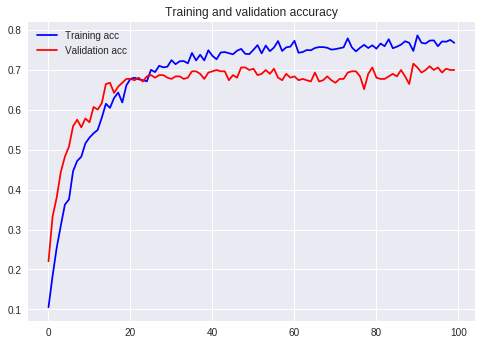

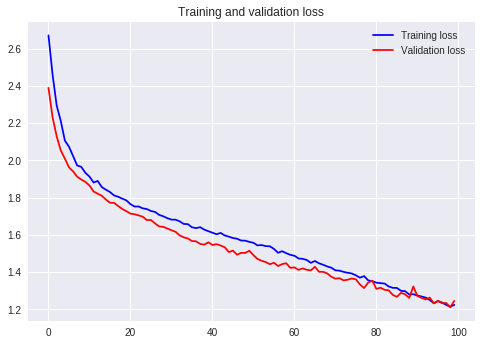

In [21]:
train_data_path = 'dataset_cfps/train'
validation_data_path = 'dataset_cfps/validation'

#Parametres
img_width, img_height = 224, 224

#Load the VGG model
#vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

vggface = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))

#vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))

last_layer = vggface.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
xx = Dense(256, activation = 'relu')(x)
x1 = BatchNormalization()(xx)
x2 = Dropout(0.5)(x1)
y = Dense(256, activation = 'relu')(x2)
yy = BatchNormalization()(y)
y1 = Dropout(0.5)(yy)
x3 = Dense(12, activation='sigmoid', name='classifier')(y1)

custom_vgg_model = Model(vggface.input, x3)


# Create the model
model = models.Sequential()
 
# Add the convolutional base model
model.add(custom_vgg_model)
 
# Add new layers
#model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(BatchNormalization())
#model.add(layers.Dropout(0.5))
# model.add(layers.Dense(12, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()
#model = load_model('facenet_resnet_lr3_SGD_new_FC_BN_5_both_layer_50_64x64')

def recall(y_true, y_pred):
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 

validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('facenet_resnet_lr3_SGD_relu_new.h5')

# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()



In [19]:
from google.colab import files
files.download('facenet_resnet_lr3_SGD_new_FC_BN_5_both_layer_50_64x64.h5')


----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 34766, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [18]:
!ls


datalab		  facenet_resnet_lr3_SGD_new_FC_BN_5_both_layer_200.h5
dataset_cfps	  facenet_resnet_lr3_SGD_new_FC_BN_5_both_layer_50_64x64.h5
dataset_cfps.zip
